<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# KNN Classification and Imputation: Cell Phone Churn Data

_Authors: Kiefer Katovich (SF)_

---

In this lab you will practice using KNN for classification (and a little bit for regression as well).

The dataset is one on "churn" in cell phone plans. It has information on the usage of the phones by different account holders and whether or not they churned or not.

Our goal is to predict whether a user will churn or not based on the other features.

We will also be using the KNN model to **impute** missing data. There are a couple of columns in the dataset with missing values, and we can build KNN models to predict what those missing values will most likely be. This is a more advanced imputation method than just filling in the mean or median.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.neighbors import KNeighborsClassifier

### 1. Load the cell phone "churn" data containing some missing values.

In [2]:
df = pd.read_csv('./churn_missing.csv')

### 2. Examine the data. What columns have missing values?

In [3]:
# Check the head
df.head(1)

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,churn
0,KS,128,415,no,yes,25.0,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False


In [4]:
# Check the shape
df.shape

(3333, 20)

In [5]:
# Check data types
df.dtypes

state              object
account_length      int64
area_code           int64
intl_plan          object
vmail_plan         object
vmail_message     float64
day_mins          float64
day_calls           int64
day_charge        float64
eve_mins          float64
eve_calls           int64
eve_charge        float64
night_mins        float64
night_calls         int64
night_charge      float64
intl_mins         float64
intl_calls          int64
intl_charge       float64
custserv_calls      int64
churn                bool
dtype: object

In [6]:
# Check features for null values 
df.isnull().sum()

state               0
account_length      0
area_code           0
intl_plan           0
vmail_plan        400
vmail_message     400
day_mins            0
day_calls           0
day_charge          0
eve_mins            0
eve_calls           0
eve_charge          0
night_mins          0
night_calls         0
night_charge        0
intl_mins           0
intl_calls          0
intl_charge         0
custserv_calls      0
churn               0
dtype: int64

### 3. Convert the `vmail_plan` and `intl_plan` colums to binary integer columns.

Make sure that if a value is missing that you don't fill it in with a new value! Preserve the missing values.

In [7]:
# After trying out other methods to handle null values with limited success, I decided to split the original DF in two, process and then concatenate back

In [8]:
# duplicate the row index number but make it a column
df['index1'] = df.index
df.head(5)

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,...,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,churn,index1
0,KS,128,415,no,yes,25.0,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0
1,OH,107,415,no,yes,26.0,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,1
2,NJ,137,415,no,no,0.0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,2
3,OH,84,408,yes,no,0.0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,3
4,OK,75,415,yes,no,0.0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,4


In [9]:
# Create a new dataframe for for non null values 
df1 = df[(df.vmail_plan == 'yes') | (df.vmail_plan == 'no')]

In [10]:
# Change 'yes' and 'no' answers into 1 and 0 in a new column 'vmail_binary'
def vmail_plan(df):
    vmail_list  = []
    for ind, row in df.iterrows():        
        if row.vmail_plan == 'yes':
            value = 1
        elif row.vmail_plan == 'no':
            value = 0
        else:
            value == 'N/A'
        vmail_list.append(value)
    
    df1['vmail_binary'] = vmail_list   
     
vmail_plan(df1)

/Users/hanhuang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [11]:
# Create a new dataframe from the original fo those only those row shat have null values in vmail_plan
df2 = df[df.vmail_plan.isnull()]

In [12]:
# populate a new column entitled vmail_binary and populate column with null values
df2['vmail_binary'] = np.nan

/Users/hanhuang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
# Concat the two new dataframes into a new one
df3 = pd.concat([df1,df2])

In [14]:
# add new column with intl_plan data converted into a binary integers
def intl_plan(df):
    intl_list  = []
    for ind, row in df.iterrows():        
        if row.intl_plan == 'yes':
            value = 1
        elif row.intl_plan == 'no':
            value = 0
        else:
            value == ''
        intl_list.append(value)
    
    df['intl_binary'] = intl_list   
     
intl_plan(df3)

In [15]:
# check the shape
df3.shape

(3333, 23)

In [16]:
# check the head
df3.head(1)

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,...,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,churn,index1,vmail_binary,intl_binary
0,KS,128,415,no,yes,25.0,265.1,110,45.07,197.4,...,91,11.01,10.0,3,2.7,1,False,0,1.0,0


In [17]:
# new column data ties with the those they were keyed off of. 
print(df3['vmail_plan'].value_counts())
print(df3['vmail_binary'].value_counts())
print(df3['intl_plan'].value_counts())
print(df3['intl_binary'].value_counts())

no     2130
yes     803
Name: vmail_plan, dtype: int64
0.0    2130
1.0     803
Name: vmail_binary, dtype: int64
no     3010
yes     323
Name: intl_plan, dtype: int64
0    3010
1     323
Name: intl_binary, dtype: int64


### 4. Create dummy coded columns for state and concatenate it to the churn dataset.

> **Remember:** You will need to leave out one of the state dummy coded columns to serve as the "reference" column since we will be using these for modeling.

In [18]:
#Create dummy variables using get_dummies from Pandas.
state_dummies = pd.get_dummies(df3.state, prefix='state')

In [19]:
# Inspect the dataframe of the dummies
state_dummies.sample(n=5, random_state=1)

,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
2688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
671,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1698,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Check match on actual row
df3.loc[671:671]

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,...,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,churn,index1,vmail_binary,intl_binary
671,CT,3,415,no,yes,36.0,118.1,117,20.08,221.5,...,89,4.68,11.9,6,3.21,2,False,671,1.0,0


In [21]:
#Drop the first column.
state_dummies.drop(state_dummies.columns[0], axis=1, inplace=True)

In [22]:
# Reinspect the dataframe of the dummies
state_dummies.sample(n=5, random_state=1)

,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
2688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
671,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1698,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns).
df3_dummies = pd.concat([df3, state_dummies], axis=1)

# Print 5 random rows.
df3_dummies.sample(n=5, random_state=1)

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
2688,OK,160,408,no,no,0.0,166.4,117,28.29,317.0,...,0,0,0,0,0,0,0,0,0,0
671,CT,3,415,no,yes,36.0,118.1,117,20.08,221.5,...,0,0,0,0,0,0,0,0,0,0
1698,FL,133,510,no,no,0.0,201.7,85,34.29,169.4,...,0,0,0,0,0,0,0,0,0,0
1265,WY,95,415,no,yes,39.0,260.8,130,44.34,213.4,...,0,0,0,0,0,0,0,0,0,1
580,IN,113,415,no,no,0.0,209.4,151,35.60,347.3,...,0,0,0,0,0,0,0,0,0,0


### 5. Create a version of the churn data that has no missing values.

Calculate the shape

In [24]:
# Create a version of the dataframe df3 that has no null values
df4 = df3[(df3.vmail_plan == 'yes') | (df3.vmail_plan == 'no')]
df4['vmail_binary'].isnull().value_counts()

False    2933
Name: vmail_binary, dtype: int64

### 6. Create a target vector and predictor matrix.

- Target should be the `churn` column.
- Predictor matrix should be all columns except `area_code`, `state`, and `churn`.

In [25]:
# For Predictor matrix

In [26]:
# convert vmail_binary column to integers
df4 = df4.astype({'vmail_binary': int})

In [27]:
# Create new column with boolean of Churn column replaced with binary integers 
def churn_plan(df):
    churn_list  = []
    for ind, row in df.iterrows():        
        if row.churn == True:
            value = 1
        elif row.churn == False:
            value = 0
        else:
            value =''
        churn_list.append(value)
    
    df4['churn_binary'] = churn_list   
     
churn_plan(df4)

In [28]:
# First: extract list of columns from the dataframe
feature_cols_unedited = list(df4.columns) 
feature_cols_unedited

['state',
 'account_length',
 'area_code',
 'intl_plan',
 'vmail_plan',
 'vmail_message',
 'day_mins',
 'day_calls',
 'day_charge',
 'eve_mins',
 'eve_calls',
 'eve_charge',
 'night_mins',
 'night_calls',
 'night_charge',
 'intl_mins',
 'intl_calls',
 'intl_charge',
 'custserv_calls',
 'churn',
 'index1',
 'vmail_binary',
 'intl_binary',
 'churn_binary']

In [29]:
# Use list comprehension to remove the elements that need to be removed
feature_cols = [ elem for elem in feature_cols_unedited if elem not in ('state', 'area_code', 'churn', 'index1', 'vmail_plan', 'intl_plan', 'churn_binary')]
feature_cols

['account_length',
 'vmail_message',
 'day_mins',
 'day_calls',
 'day_charge',
 'eve_mins',
 'eve_calls',
 'eve_charge',
 'night_mins',
 'night_calls',
 'night_charge',
 'intl_mins',
 'intl_calls',
 'intl_charge',
 'custserv_calls',
 'vmail_binary',
 'intl_binary']

In [30]:
# Check new column counts matches prior
print(df4.churn.value_counts())
print(df4.churn_binary.value_counts())

False    2512
True      421
Name: churn, dtype: int64
0    2512
1     421
Name: churn_binary, dtype: int64


In [31]:
# set the target vector and predictor matrix
X = df4[feature_cols]
y = df4.churn

### 7. Calculate the baseline accuracy for `churn`.

In [32]:
df4.churn.value_counts()

False    2512
True      421
Name: churn, dtype: int64

In [33]:
# Baseline accuracy for churn with Train data,
# If you alway predicted false you would be right 85.6% of the time
2512/(2512+421)

0.8564609614728946

### 8. Cross-validate a KNN model predicting `churn`. 

- Number of neighbors should be 5.
- Make sure to standardize the predictor matrix.
- Set cross-validation folds to 10.

Report the mean cross-validated accuracy.

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [35]:
# instantiate train/test/split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Instantiate and fit StandardScaler.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
# Calculate testing error. Set Knn to 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
testing_error = 1 - testing_accuracy

print(testing_accuracy)
print(testing_error)

0.8937329700272479
0.10626702997275206


In [37]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [38]:
kf = model_selection.KFold(n_splits=10, shuffle=True)

In [39]:
mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))
    print('mean accuracy: {}\n'.format(y_test.value_counts()[y_train.value_counts().index[0]] / len(y_test)))
    


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))
print('mean accuracy: {}\n'.format(y_test.value_counts()[y_train.value_counts().index[0]] / len(y_test)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 0.08311885812404914
R2: 0.18007873383302656

mean accuracy: 0.8610354223433242

Model 2
MSE: 0.10663372006175503
R2: 0.18027458286013875

mean accuracy: 0.8610354223433242

Model 3
MSE: 0.10413302788741863
R2: 0.18043698366198713

mean accuracy: 0.8610354223433242

Model 4
MSE: 0.09931829216855306
R2: 0.1801535783167585

mean accuracy: 0.8610354223433242

Model 5
MSE: 0.10098220407143728
R2: 0.18017615686878574

mean accuracy: 0.8610354223433242

Model 6
MSE: 0.10111283597779344
R2: 0.18018750964705751

mean accuracy: 0.8610354223433242

Model 7
MSE: 0.12624949136017613
R2: 0.17945254116880857

mean accuracy: 0.8610354223433242

Model 8
MSE: 0.09440027292661496
R2: 0.1801298975466301

mean accuracy: 0.8610354223433242

Model 9
MSE: 0.10218428966594562
R2: 0.18004791369741183

mean accuracy: 0.8610354223433242

Model 10
MSE: 0.10356893039818753
R2: 0.17990269899852984

mean accuracy: 0.8610354223433242

~~~~ SUMMARY OF CROSS VALIDATION ~

In [40]:
# not sure how to get mean accuracy to apply at the model level ^^^^

### 9. Iterate from k=1 to k=49 (only odd k) and cross-validate the accuracy of the model for each.

Plot the cross-validated mean accuracy for each score. What is the best accuracy?

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [42]:
# instantiate train/test/split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [43]:
# Calculate TRAINING ERROR and TESTING ERROR for K=1 through 49

k_range = list(range(1, 50))
training_error = []
testing_error = []

# Find test accuracy for all values of K between 1 and 49 (inclusive).
for k in k_range:

    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training error (error = 1 - accuracy).
    y_pred_class = knn.predict(X)
    training_accuracy = metrics.accuracy_score(y, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # Calculate testing error.
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

In [44]:
# Allow plots to appear in the notebook.
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [45]:
# Create a DataFrame of K, training error, and testing error.
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
#df
print(df.to_string())

    training error  testing error
K                                
49        0.127174       0.096730
48        0.126833       0.096730
47        0.126833       0.096730
46        0.127174       0.098093
45        0.127174       0.098093
44        0.126833       0.098093
43        0.126151       0.098093
42        0.126833       0.096730
41        0.125469       0.096730
40        0.125469       0.096730
39        0.124446       0.096730
38        0.125469       0.096730
37        0.122741       0.094005
36        0.124446       0.096730
35        0.122741       0.091281
34        0.123764       0.092643
33        0.123082       0.092643
32        0.124446       0.094005
31        0.122400       0.089918
30        0.124105       0.092643
29        0.121377       0.092643
28        0.122400       0.092643
27        0.121377       0.092643
26        0.121718       0.092643
25        0.121036       0.092643
24        0.121036       0.091281
23        0.120696       0.089918
22        0.12

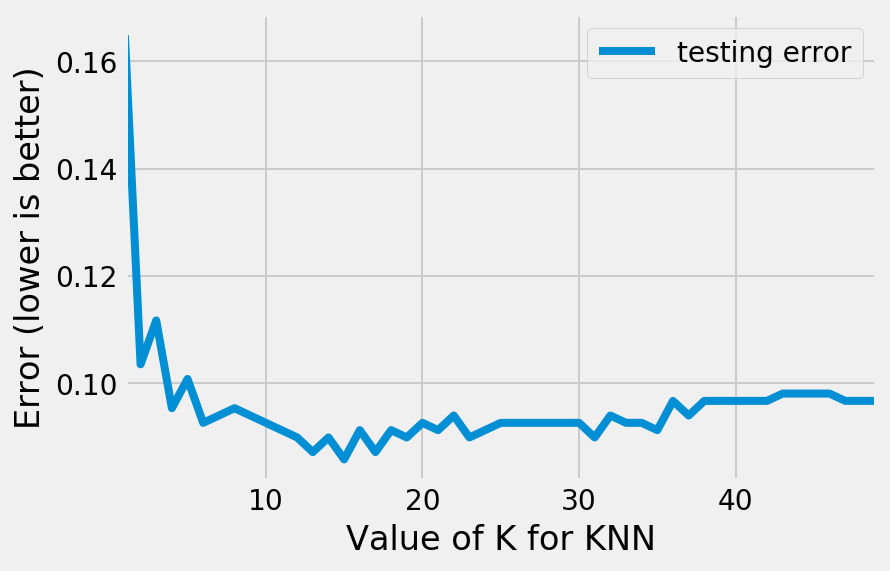

In [46]:
# Plot the relationship between K (HIGH TO LOW) and TESTING ERROR.
df.plot(y='testing error');
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

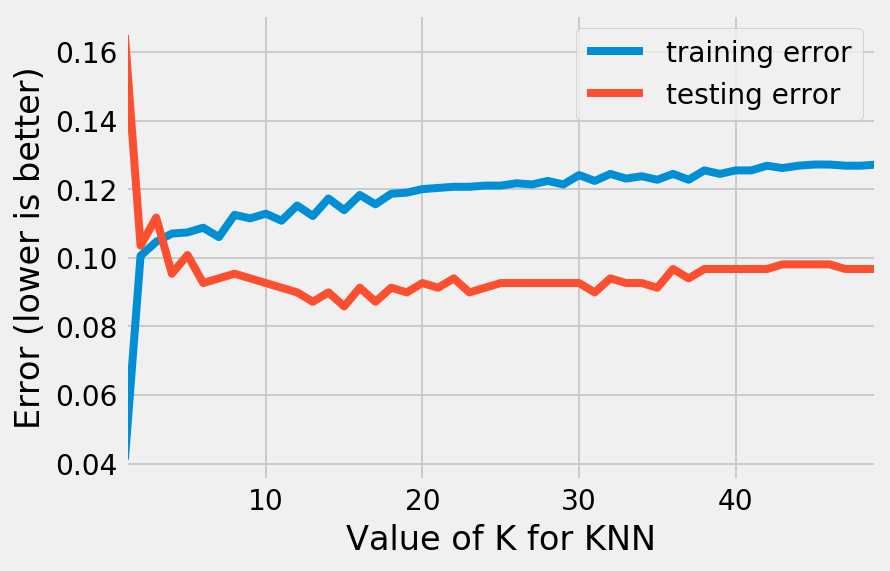

In [47]:
# Plot the relationship between K (HIGH TO LOW) and both TRAINING ERROR and TESTING ERROR.
df.plot();
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

In [48]:
# k = 5

### 10. Imputing with KNN

K-Nearest Neighbors can be used to impute missing values in datasets. What we will do is estimate the most likely value for the missing data based on a KNN model.

We have two columns with missing data:
- `vmail_plan`
- `vmail_message`

**10.A Create two subsets of the churn dataset: one without missing values for `vmail_plan` and `vmail_message`, and one with the missing values.**

In [51]:
# Create a copy of the df that does no missing values
df5 = df1
df5.isnull().sum()

state             0
account_length    0
area_code         0
intl_plan         0
vmail_plan        0
vmail_message     0
day_mins          0
day_calls         0
day_charge        0
eve_mins          0
eve_calls         0
eve_charge        0
night_mins        0
night_calls       0
night_charge      0
intl_mins         0
intl_calls        0
intl_charge       0
custserv_calls    0
churn             0
index1            0
vmail_binary      0
dtype: int64

In [52]:
# Create a copy of the df that does no missing values
df6 = df2
df6.isnull().sum()

state               0
account_length      0
area_code           0
intl_plan           0
vmail_plan        400
vmail_message     400
day_mins            0
day_calls           0
day_charge          0
eve_mins            0
eve_calls           0
eve_charge          0
night_mins          0
night_calls         0
night_charge        0
intl_mins           0
intl_calls          0
intl_charge         0
custserv_calls      0
churn               0
index1              0
vmail_binary      400
dtype: int64

First we will impute values for `vmail_plan`. This is a categorical column and so we will impute using classification (predicting whether the plan is yes or no, 1 vs. 0).

**10.B Create a target that is `vmail_plan` and predictor matrix that is all columns except `state`, `area_code`, `churn`, `vmail_plan`, and `vmail_message`.**

> **Note:** We don't include the `churn` variable in the model to impute. Why? We are imputing these missing values so that we can use the rows to predict churn with more data afterwards. If we imputed with churn as a predictor then we would be cheating.

In [53]:
feature_cols_unedited = df5.columns
feature_cols_unedited

Index(['state', 'account_length', 'area_code', 'intl_plan', 'vmail_plan',
       'vmail_message', 'day_mins', 'day_calls', 'day_charge', 'eve_mins',
       'eve_calls', 'eve_charge', 'night_mins', 'night_calls', 'night_charge',
       'intl_mins', 'intl_calls', 'intl_charge', 'custserv_calls', 'churn',
       'index1', 'vmail_binary'],
      dtype='object')

In [55]:
# Use list comprehension to remove the elements that need to be removed
feature_cols = [ elem for elem in feature_cols_unedited if elem not in ('state', 'area_code', 'churn', 'index1','intl_plan','vmail_plan', 'vmail_message', 'vmail_binary')]
feature_cols

['account_length',
 'day_mins',
 'day_calls',
 'day_charge',
 'eve_mins',
 'eve_calls',
 'eve_charge',
 'night_mins',
 'night_calls',
 'night_charge',
 'intl_mins',
 'intl_calls',
 'intl_charge',
 'custserv_calls']

In [56]:
# set the target vector and predictor matrix
X = df5[feature_cols]
y = df5.vmail_binary

In [57]:
X.dtypes

account_length      int64
day_mins          float64
day_calls           int64
day_charge        float64
eve_mins          float64
eve_calls           int64
eve_charge        float64
night_mins        float64
night_calls         int64
night_charge      float64
intl_mins         float64
intl_calls          int64
intl_charge       float64
custserv_calls      int64
dtype: object

In [58]:
# Check y's type.
print((type(y)))
print((type(y.values)))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


**10.C Standardize the predictor matrix.**

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=98)

In [60]:
from sklearn.preprocessing import StandardScaler

sscaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**10.D Find the best K for predicting `vmail_plan`.**

You may want to write a function for this. What is the accuracy for predicting `vmail_plan` at the best K? What is the baseline accuracy for `vmail_plan`?

In [66]:
# Calculate TRAINING ERROR and TESTING ERROR for K=1 through 49

k_range = list(range(1, 49))
training_error = []
testing_error = []

# Find test accuracy for all values of K between 1 and 49 (inclusive).
for k in k_range:

    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training error (error = 1 - accuracy).
    y_pred_class = knn.predict(X)
    training_accuracy = metrics.accuracy_score(y, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # Calculate testing error.
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

In [67]:
# Create a DataFrame of K, training error, and testing error.
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
#df
print(df.to_string())

    training error  testing error
K                                
48        0.273781       0.269165
47        0.273781       0.269165
46        0.273781       0.269165
45        0.273781       0.270869
44        0.273781       0.270869
43        0.273781       0.270869
42        0.273781       0.270869
41        0.273781       0.270869
40        0.273781       0.270869
39        0.273781       0.270869
38        0.273781       0.270869
37        0.273781       0.272572
36        0.273781       0.267462
35        0.273781       0.272572
34        0.273781       0.267462
33        0.273781       0.272572
32        0.273781       0.272572
31        0.273781       0.274276
30        0.273781       0.269165
29        0.273781       0.275980
28        0.273781       0.277683
27        0.274122       0.279387
26        0.273781       0.275980
25        0.274804       0.281090
24        0.274122       0.279387
23        0.275145       0.281090
22        0.274804       0.279387
21        0.27

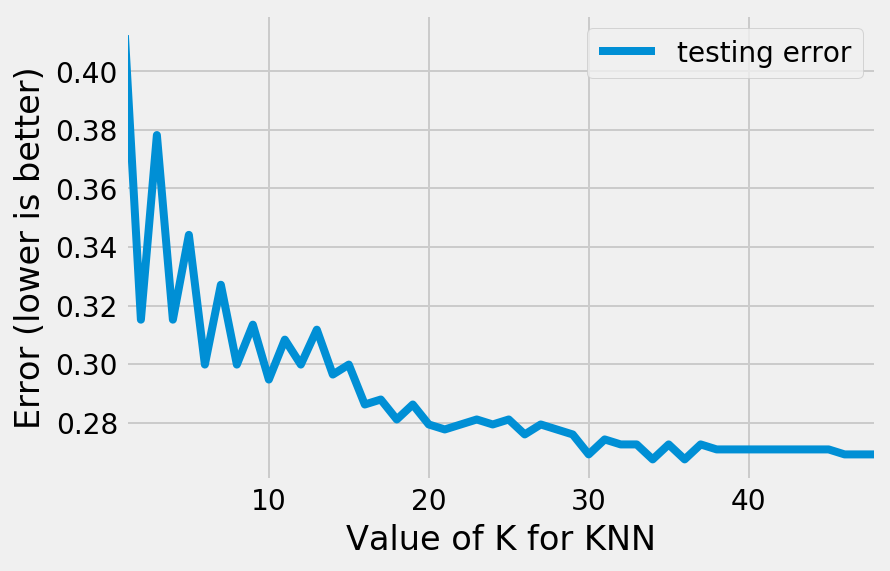

In [68]:
# Plot the relationship between K (HIGH TO LOW) and TESTING ERROR.
df.plot(y='testing error');
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

In [69]:
# k = 10 is the optimal but there are onlhy small variations between many k results

In [70]:
df5.vmail_plan.value_counts()

no     2130
yes     803
Name: vmail_plan, dtype: int64

In [71]:
# baseline accuracy
2130/(2130+803)

0.726218888510058

**10.E Fit a `KNeighborsClassifier` with the best number of neighbors.**

In [72]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [73]:
print((metrics.accuracy_score(y_test, y_pred_class)))

0.7308347529812607


**10.F Predict the missing `vmail_plan` values using the subset of the data where it is misssing.**

You will need to:
1. Create a new predictor matrix using the same predictors but from the missing subset of data.
- Standardize this predictor matrix *using the StandardScaler object fit on the non-missing data*. This means you will just use the `.transform()` function. It is important to standardize the new predictors the same way we standardized the original predictors if we want the predictions to make sense. Calling `.fit_transform()` will reset the standardized scale.
- Predict what the missing vmail plan values should be.
- Replace the missing values in the original with the predicted values.

> **Note:** It may predict all 0's. This is OK. If you want to see the predicted probabilities of `vmail_plan` for each row you can use the `.predict_proba()` function instead of `.predict()`.  You can use these probabilities to manually set the criteria threshold.

In [74]:
# use df df6 for this purpose
df6.isnull().sum()

state               0
account_length      0
area_code           0
intl_plan           0
vmail_plan        400
vmail_message     400
day_mins            0
day_calls           0
day_charge          0
eve_mins            0
eve_calls           0
eve_charge          0
night_mins          0
night_calls         0
night_charge        0
intl_mins           0
intl_calls          0
intl_charge         0
custserv_calls      0
churn               0
index1              0
vmail_binary      400
dtype: int64

In [75]:
len(df5)

2933

In [76]:
# set predictor matrix for new X_test data
X_test = df6[feature_cols]


In [77]:
# Scale new X_test data
scaler.transform(X_test)

array([[ 0.49809242,  0.71556389, -0.62454337, ...,  1.03730904,
        -0.98724591,  1.07781466],
       [ 0.39711596,  0.08175802, -0.17150428, ..., -0.19485653,
        -0.56457726, -0.43402581],
       [ 1.50785699,  2.8727607 , -1.68163457, ...,  1.85875276,
        -1.74012444,  1.83373489],
       ...,
       [ 0.6495571 , -1.35888083,  1.38896368, ..., -1.83774396,
        -3.66855015, -1.18994605],
       [-0.66313684, -0.50691033, -1.12792013, ..., -0.60557839,
        -0.88157875, -0.43402581],
       [ 1.55834522,  0.32061068, -0.52386802, ...,  1.4480309 ,
        -0.88157875, -0.43402581]])

### 11. Impute the missing values for `vmail_message` using the same process.

Since `vmail_message` is essentially a continuous measure, you need to use `KNeighborsRegressor` instead of the `KNeighborsClassifier`.

KNN can do both regression and classification! Instead of "voting" on the class like in classification, the neighbors will average their value for the target in regression.

In [78]:
# Length of new X-test
len(X_test)

400

In [79]:
# Imputed values
y_pred_class = knn.predict(X_test)
y_pred_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [81]:
# Count of predictions
np.sum(y_pred_class)

12

In [82]:
# very low percentage of yes predictions
np.sum(y_pred_class)/len(df5)

0.004091374019774974

### 12. Given the accuracy (and $R^2$) of your best imputation models when finding the best K neighbors, do you think imputing is a good idea?

In [18]:
# Not sure

### 13. With the imputed dataset, cross-validate the accuracy predicting churn. Is it better? Worse? The same?

In [104]:
# Not sure